# Trabajo Practico - Desarrollo de software para el cálculo de parámetros acústicos ISO 3382 (2da entrega)

## Fecha de entrega

*15/05/2023*

## Integrantes

* <Martín, Romeo>
* <Rómulo, Achulli Orccori>
* <Luca, Falchini>
* <Fausto, Doce>

## Aspectos generales del notebook

* Todas las funciones deben contar con su [docstring](https://realpython.com/documenting-python-code/#docstring-types), como figura en la función de ejemplo (`ruidoRosa_voss`)(1er entrega).
* Todos los gráficos deben tener correctamente etiquetados los ejes.
* Enviar el notebook (.ipynb) completado y con las celdas ejecutas a myommi@untref.edu.ar.
* Todas las señales de audio deben ser grabadas en formato .wav en la misma función que las genera.

## Librerias utilizadas
Agregar todas las librerias utilizadas, algunas a modo de ejemplo:

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import soundfile as sf
import sounddevice as sd
import sympy as sym
import IPython.display as ipd
from scipy.io import wavfile
from scipy.io.wavfile import write

## Descargar dataset
El objetivo es tener archivos para validar el software creado , para lo cual es necesario contar con la información y los datos de la medición.

### 1. Respuestas al impulso: 
**Consigna:** Descargar **al menos dos** respuestas al impulso (RI o en ingles IR, Impulse Responses) de dos recintos distintos del siguiente [link](https://www.openair.hosted.york.ac.uk/?page_id=36) y toda la información relevante de la medición, ademas de los resultados de los parametros acústicos calculados (para luego comparar). También se pueden usar los archivos dispuestos en el Drive de la asignatura. 

### 2. Sine sweep logarítmico + filtro inverso: 
**Consigna:** Descargar **al menos un** sine sweep con su respectivo filtro inverso. Una posibildiad es usar los archivos dispuestos en el GDrive de la asignatura. Para generar el filtro inverso usar la info brindada por el informe técnico en la misma carpeta de los archivos. 

## Función de carga de archivos de audio

**Consigna:** realizar una función que permita cargar archivos de audio, en lo posible \*.wav, por ejemplo los archivos anteriormente descargados. Contemplar el ingreso de más de un archivo de audio, por tipo.

In [1]:
from funciones import *

In [2]:
# Funcion para seleccionar archivos

fileselect = Button(description="Seleccione el/los archivo/s")
fileselect.on_click(select_files)
display(fileselect)

[('C:/Users/Equipo/Desktop/Señales y sistemas/signal-systems/trabajo_practico/noteboks/central-hall-university-york/examples/ir_row_1l_sl_centre.mp3', 'C:/Users/Equipo/Desktop/Señales y sistemas/signal-systems/trabajo_practico/noteboks/central-hall-university-york/examples/ir_row_1l_sl_centre_drum.mp3', 'C:/Users/Equipo/Desktop/Señales y sistemas/signal-systems/trabajo_practico/noteboks/central-hall-university-york/examples/ir_row_1l_sl_centre_sing.mp3')]


In [3]:
print(len(wav_list), wav_list)

3 [(array([ 0.0000000e+00,  5.8075775e-12, -2.6214725e-12, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), 48000), (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 48000), (array([ 0.0000000e+00, -1.3501957e-15, -1.1866953e-15, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), 48000)]


Llamar a la función con uno de los ejemplos anteriormente descargados y usar la función de visualización de la 1er entrega.

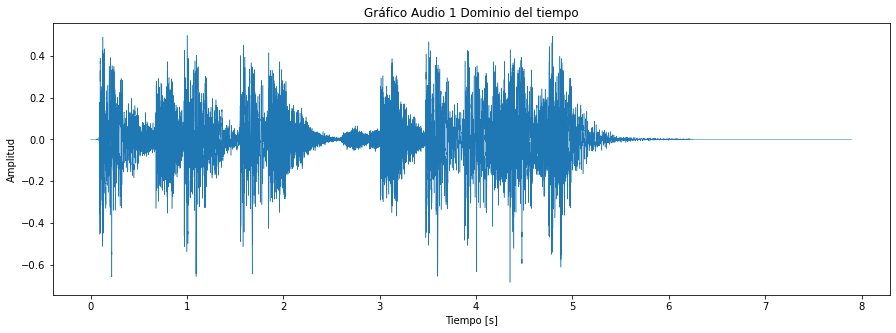

()

In [4]:
time_domain_plot(wav_list[1][0],wav_list[1][1], "Audio 1")

In [76]:
# For play audio in Jupyter Notebook
ipd.Audio(files_list[0][1]) # play audio directly in a Jupyter notebook.


> **Opcional**: el código de la siguiente celda genera un botón de selección (ver los pasos de instalación [aqui](https://ipywidgets.readthedocs.io/en/latest/user_install.html)), y guarda las rutas a los archivos seleccionados en la variable files. La función desarrollada debería tomar las rutas y leer el contenido de los archivos, utilizando alguna de las librerías vistas en clase.

## Función de sintetización de respuesta al impulso

**Consigna:** realizar una función para sintetizar una respuesta al impulso. La misma recibira como parametro el $T60$ que se desea obtener, y deberá sintetizar una respuesta al impulso considerando las frecuencias centrales de banda de octava y tercio de octava como establece la norma IEC61260 (IEC61260,1995). La siguiente ecuación define una RI, para una frecuencia central $f_{i}$:

\begin{equation}
y_{i}=A_{i}e^{\tau_it}\cos(2πf_{i}t)
\tag{6}
\end{equation}

donde $A_{i}$ es el coeficiente de amplitud para esa $f_{i}$(puede ser 1), y  $tau_i$ define el decaimiento exponencial en función de $T_{60_i}$ (tiempo de reverberación) para una frecuencia $f_{i}$.

\begin{equation}
\tau_i=-\frac{ln(10^{-3})}{T_{60_i}}
\tag{7}
\end{equation}

La suma de varias frecuencias centrales $f_{i}$ se define como:
\begin{equation}
  y=\sum_{y=1}^{n}y_{i}
\tag{8}
\end{equation}

Con $n$ la cantidad de frecuencias centrales $f_{i}$ del filtro. La funcion debe recibir el tiempo de reverberacion para cada frecuencia, y devolver la respuesta al impulso correspondiente como un archivo de audio .wav. Al momento de definir la función, buscar la forma de que la misma permita varios $T60_i$ para cada frecuencia. 

> Con esta funcion se busca obtener un archivo de audio de valores de $T60_i$ conocidos que permita probar el software.

Bandas de Octava según IEC 61260

![](../img/IEC_61260.png)


In [33]:
nominal_frec = [31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000]

nominal_frec_third = [25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250,
                1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500, 16000, 20000]

In [40]:
len(nominal_frec_third)

30

In [3]:
def ir_sint(f_i, tr_i_list, tiempo_impulso, frec_muestreo=44100):
    t = np.arange(0, tiempo_impulso*frec_muestreo)/frec_muestreo
    y_i_list = []
    for i in range(len(nominal_frec)):
        tau_i = np.log(10**(-3))/tr_i_list[i]
        y_i = (np.exp(tau_i*t))*np.cos(2*np.pi*f_i[i]*t)
        y_i_list.append(y_i)

    y = sum(y_i_list)
    # Normalizado
    y_max = max(abs(max(y)), abs(min(y)))
    y_norm = y/y_max 
    # Guardar archivo wav
    write('IR_sint.wav', frec_muestreo, y_norm)
    # Info del numpy array
    print(type(y_norm), y_norm)
    return(y_norm, frec_muestreo)


Llamar a la función con un vector que contega varios $T60$ para las cada frecuencias centrales $f_{i}$.

In [10]:
# completar
# Genero un vector con T60i para cada frecuencia según los datos descargados de 
# Openair.com, CEntral Hall, University of York

tr_i_list = [2.67, 1.58, 1.42, 1.07, 1.11, 1.12, 1.03, 0.86, 0.63, 1.95]

In [11]:
f_i = nominal_frec
tiempo_impulso = 3
frec_muestreo = 44100
ir_test, fs = ir_sint(f_i, tr_i_list, tiempo_impulso, frec_muestreo)

<class 'numpy.ndarray'> [ 1.00000000e+00  7.55390534e-01  6.40095802e-01 ... -4.02749544e-05
 -4.27046094e-05 -4.39116733e-05]


Reproducir señal resultante.

In [12]:
from funciones import reproducir
reproducir('IR_sint.wav')

array([ 1.0000000e+00,  7.5539052e-01,  6.4009583e-01, ...,
       -4.0274954e-05, -4.2704611e-05, -4.3911674e-05], dtype=float32)

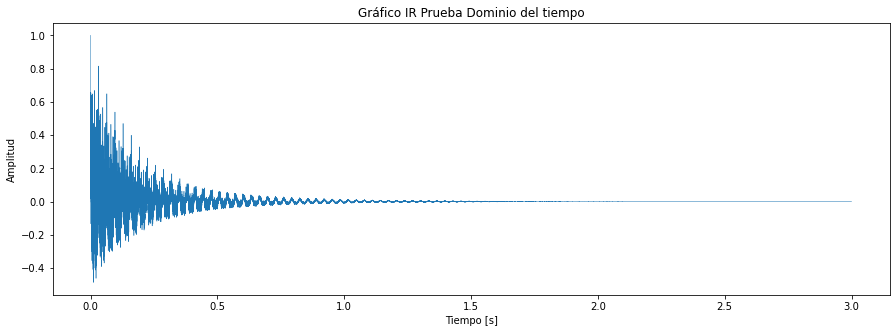

()

In [13]:
from funciones import time_domain_plot
time_domain_plot(ir_test, fs, 'IR Prueba')

Comentar sobre el resultado obtenido, ¿Es una buena aproximación? ¿Qué aspectos estamos dejando de lado en esta sintetización, que en un caso real estan presentes?.

*completar*

## Función obtener respuesta al impulso

**Consigna:** realizar una función que permita obtener la respuesta al impulso en formato de señal de audio .wav, a partir del sinesweep logarítmico grabado y el filtro inverso generado utilizando el siguiente método: 

Supongamos que un recinto es excitado por una señal sinesweep logarítmica $x(t)$ y captada por un micrófono $y(t)$ y buscamos la RI del recinto $h(t)$, lo anterior se expresa de la siguiente manera:

\begin{equation}
y(t)=x(t)*h(t)
\tag{9}
\end{equation}

Para un sine sweep lineal (que no es nuestro caso) el problema es sencillo, pero en nuestro caso (sine sweep logarítmico) requiere trabajar un poco respecto $x(t)$ para obtener la siguiente expresión:

\begin{equation}
h(t) = F^{-1}[H(jw)]=F^{-1}[Y(jw)K(jw)]
\tag{10}
\end{equation}

Recordar que $k(t)$ es el filtro inverso (ecu.5) y $K(jw)$ su respectiva transformada de fourier. De esta manera se obtiene la respuesta al impulso buscada.

> El desarrollo matemático de la anterior expresión se encuentra en el [Anexo I - Obtener la respuesta al impulso a partir de un sine sweep](../consigna_TP_matlab.pdf) (p.14) del instructivo para Matlab del TP.

In [13]:
# completar
def respuesta_impulso(rec_sine_sweep, invfilter, fs, nombre_impulso="impulso"):
    """
    Función que genera un impulso a través de la convolución un sinesweep logarítmico grabado y un filtro inverso.

    Parametros
    ----------
    rec_sine_sweep: str
        Archivo ".wav" del sine sweep grabado.

    invfilter: str
        Nombre del archivo ".wav" del filtro inverso.
    
    fs: int
        Frecuencia de muestreo.

    Returns
    -------
    Archivo impulso_generado.wav.
    """

    data_sweep, fs = sf.read(rec_sine_sweep)  
    data_invfilter, fs = sf.read(invfilter)

    impulso = signal.fftconvolve(data_sweep, data_invfilter, mode='full')
    impulso_max = max(abs(max(impulso)), abs(min(impulso)))
    impulso_norm = impulso/impulso_max 
    sf.write("{}.wav".format(nombre_impulso), impulso_norm, fs)

    return impulso_norm


Llamar a la función con un sine sweep y su respectivo filtro inverso creados con la función de la primer entrega (**no** los descargados).

In [14]:
# completar
rec_sine_sweep = "record_SineSweepLog.wav"
invfilter = "InvFilter.wav"
fs = 44100
respuesta_impulso(rec_sine_sweep, invfilter, fs)

array([-2.55700536e-07,  6.69751129e-07,  1.77987139e-06, ...,
        9.19712929e-08,  9.82379499e-08,  5.68954626e-08])

Visualizar la señal con la función creada en la primer entrega.

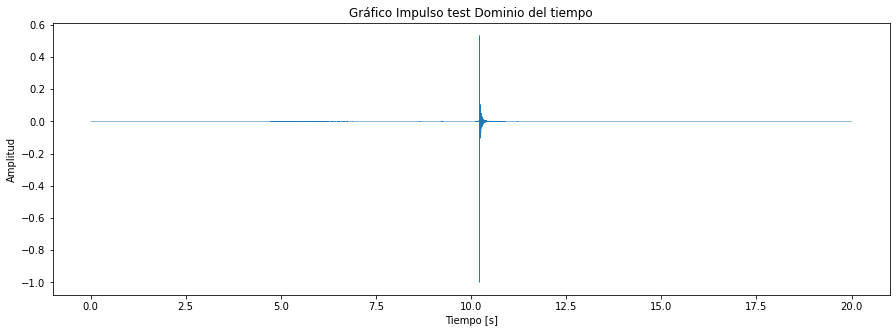

()

In [15]:
# completar
from funciones import time_domain_plot
fs = 44100
data, fs = sf.read("impulso.wav")
graph_name = "Impulso test"
time_domain_plot(data, fs, graph_name)

Reproducir señal resultante.

In [16]:
# completar
from funciones import reproducir
reproducir("impulso.wav")

array([-3.0517578e-05,  0.0000000e+00,  0.0000000e+00, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

Comentar sobre el resultado obtenido. ¿Qué es lo que se esta escuchando? Realizar el mismo procedimiento con la señal descargada y el filtro inverso generado (para dicho sine sweep)

Se escucha un impulso gracias a la convolución del sine sweep grabado y un filtro inverso generado. Es decir, una aproximación a como sonaría un impulso en el recintodonde se grabó el Sine Sweep.

In [22]:
# completar
rec_sine_sweep_2 = "TP/Mediciones/Sine sweep logaritmico/Aula 2do Informatica/Toma_n1_a-03.wav"
invfilter_2 = "TP/Mediciones/Sine sweep logaritmico/Aula 2do Informatica/filtro_inverso.wav"
fs = 44100
nombre_impulso_2 = "impulso_aula2"
respuesta_impulso(rec_sine_sweep_2, invfilter_2, fs, nombre_impulso_2)

array([-2.30675406e-18, -5.87039336e-18,  2.05896145e-08, ...,
       -1.48355432e-10, -3.63018028e-18, -3.18657372e-18])

In [24]:
reproducir("impulso_aula2.wav")

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

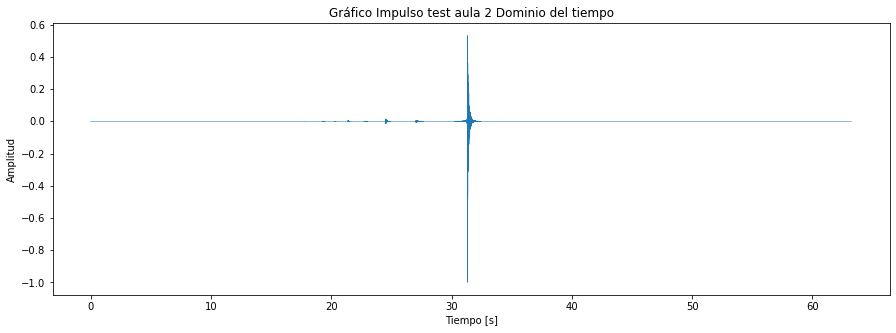

()

In [23]:
fs = 44100
data_2, fs = sf.read("impulso_aula2.wav")
graph_name_2 = "Impulso test aula 2"
time_domain_plot(data_2, fs, graph_name_2)

Mencionar aspectos que diferencian los impulso generados en esta función, con los sintetizados.

*completar*

## Función filtros norma IEC61260

**Consigna**: Realizar una función que filtre todas las señales en octavas y tercio de octava según la norma IEC61260, con el objetivo de calcular los parámetros acústicos discriminando las frecuencias. 

Para lo cual utilizar las funciones del modulo [signals de scipy](https://docs.scipy.org/doc/scipy/reference/signal.html). Se adjunta el código capaz de calcular los coeficientes del filtro y aplicarlos a una señal. La función debe completarse con el código necesario para que este proceso se repita para cada una de las frecuencias centrales determinadas en la norma. Así mismo, el primer argumento de la función [iirfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html) determina el grado del filtro. Evaluar el valor del mismo para que la frecuencia central de la banda coincida con las especificadas en la norma.

> Para ver una introducción breve a la implementación de filtros, usar el siguiente [documento](https://github.com/maxiyommi/signal-systems/blob/master/material_extra/Filtros/intro_filtros.ipynb).

In [67]:
def filtro_IEC(archivo):
    audiodata, fs = sf.read(archivo)
    lista_filtros = []
    nominal_frec = [31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000]
    for i in range(len(nominal_frec)):
        #Octava - G = 1.0/2.0 / 1/3 de Octava - G=1.0/6.0
        G = 1.0/2.0
        factor = np.power(2, G)
        centerFrequency_Hz = nominal_frec[i]

        #Calculo los extremos de la banda a partir de la frecuencia central
        lowerCutoffFrequency_Hz = centerFrequency_Hz/factor;
        upperCutoffFrequency_Hz = centerFrequency_Hz*factor;
        if upperCutoffFrequency_Hz >= (fs/2):
            upperCutoffFrequency_Hz = (fs/2)-1
            
        print('Frecuencia de corte inferior: ', round(lowerCutoffFrequency_Hz), 'Hz')
        print('Frecuencia de corte superior: ', round(upperCutoffFrequency_Hz), 'Hz')

        # Extraemos los coeficientes del filtro 
        b,a = signal.iirfilter(4, [2*np.pi*lowerCutoffFrequency_Hz,2*np.pi*upperCutoffFrequency_Hz],
                                    rs=60, btype='band', analog=True,
                                    ftype='butter') 

        # para aplicar el filtro es más óptimo
        sos = signal.iirfilter(4, [lowerCutoffFrequency_Hz,upperCutoffFrequency_Hz],
                                    rs=60, btype='band', analog=False,
                                    ftype='butter', fs=fs, output='sos') 
        w, h = signal.freqs(b,a)

        # aplicando filtro al audio
        filt = signal.sosfilt(sos, audiodata)
        

        list = [centerFrequency_Hz, filt, h, w]
        lista_filtros.append(list)
        
    return(lista_filtros)

In [63]:
# Intentamos generar una funcion para elegir entre bandas nominales y bandas de tercio de octava y no encontramos el error.
# La lista sale en blanco
'''def filtro_IEC(archivo):
    x = input("Si el filtro es de octava marca 1, si es de tercio marca 2")
    audiodata, fs = sf.read(archivo)
    lista_filtros = []
    
    if x == 1:
        
        nominal_frec = [31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000]
        for i in range(len(nominal_frec)):
            #Octava - G = 1.0/2.0 / 1/3 de Octava - G=1.0/6.0
            G = 1.0/2.0
            factor = np.power(2, G)
            centerFrequency_Hz = nominal_frec[i]

            #Calculo los extremos de la banda a partir de la frecuencia central
            lowerCutoffFrequency_Hz = centerFrequency_Hz/factor;
            upperCutoffFrequency_Hz = centerFrequency_Hz*factor;
            if upperCutoffFrequency_Hz >= (fs/2):
                upperCutoffFrequency_Hz = (fs/2)-1
                
            print('Frecuencia de corte inferior: ', round(lowerCutoffFrequency_Hz), 'Hz')
            print('Frecuencia de corte superior: ', round(upperCutoffFrequency_Hz), 'Hz')

            # Extraemos los coeficientes del filtro 
            b,a = signal.iirfilter(4, [2*np.pi*lowerCutoffFrequency_Hz,2*np.pi*upperCutoffFrequency_Hz],
                                        rs=60, btype='band', analog=True,
                                        ftype='butter') 

            # para aplicar el filtro es más óptimo
            sos = signal.iirfilter(4, [lowerCutoffFrequency_Hz,upperCutoffFrequency_Hz],
                                        rs=60, btype='band', analog=False,
                                        ftype='butter', fs=fs, output='sos') 
            w, h = signal.freqs(b,a)

            # aplicando filtro al audio
            filt = signal.sosfilt(sos, audiodata)
            

            list = [centerFrequency_Hz, filt, h, w]
            lista_filtros.append(list)

            sf.write("Resp_aula2_fil1k.wav", filt, fs)
         
    if x == 2:
        
        nominal_frec_third = [25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250,
                1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500, 16000, 20000]
        for i in range(len(nominal_frec_third)):
            #Octava - G = 1.0/2.0 / 1/3 de Octava - G=1.0/6.0
            G = 1.0/2.0
            factor = np.power(2, G)
            centerFrequency_Hz = nominal_frec_third[i]

            #Calculo los extremos de la banda a partir de la frecuencia central
            lowerCutoffFrequency_Hz = centerFrequency_Hz/factor;
            upperCutoffFrequency_Hz = centerFrequency_Hz*factor;
            if upperCutoffFrequency_Hz >= (fs/2):
                upperCutoffFrequency_Hz = (fs/2)-1
                
            print('Frecuencia de corte inferior: ', round(lowerCutoffFrequency_Hz), 'Hz')
            print('Frecuencia de corte superior: ', round(upperCutoffFrequency_Hz), 'Hz')

            # Extraemos los coeficientes del filtro 
            b,a = signal.iirfilter(4, [2*np.pi*lowerCutoffFrequency_Hz,2*np.pi*upperCutoffFrequency_Hz],
                                        rs=60, btype='band', analog=True,
                                        ftype='butter') 

            # para aplicar el filtro es más óptimo
            sos = signal.iirfilter(4, [lowerCutoffFrequency_Hz,upperCutoffFrequency_Hz],
                                        rs=60, btype='band', analog=False,
                                        ftype='butter', fs=fs, output='sos') 
            w, h = signal.freqs(b,a)

            # aplicando filtro al audio
            filt = signal.sosfilt(sos, audiodata)
            

            list = [centerFrequency_Hz, filt, h, w]
            lista_filtros.append(list)

            sf.write("Resp_aula2_fil1k.wav", filt, fs)
        else:
            print("El valor no corresponde")

    return(lista_filtros)'''    



Llamar a la función con alguna RI generada anteriormente.

In [77]:
archivo = 'impulso_aula2.wav'

frec = filtro_IEC(archivo)
frec

Frecuencia de corte inferior:  22 Hz
Frecuencia de corte superior:  45 Hz
Frecuencia de corte inferior:  45 Hz
Frecuencia de corte superior:  89 Hz
Frecuencia de corte inferior:  88 Hz
Frecuencia de corte superior:  177 Hz
Frecuencia de corte inferior:  177 Hz
Frecuencia de corte superior:  354 Hz
Frecuencia de corte inferior:  354 Hz
Frecuencia de corte superior:  707 Hz
Frecuencia de corte inferior:  707 Hz
Frecuencia de corte superior:  1414 Hz
Frecuencia de corte inferior:  1414 Hz
Frecuencia de corte superior:  2828 Hz
Frecuencia de corte inferior:  2828 Hz
Frecuencia de corte superior:  5657 Hz
Frecuencia de corte inferior:  5657 Hz
Frecuencia de corte superior:  11314 Hz
Frecuencia de corte inferior:  11314 Hz
Frecuencia de corte superior:  22049 Hz


[[31.5,
  array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -2.25065121e-07, -2.18973181e-07, -2.12909949e-07]),
  array([ 1.62921471e-18-1.52101412e-22j,  2.05343441e-18-2.03124068e-22j,
          2.58811368e-18-2.71262355e-22j,  3.26201431e-18-3.62257736e-22j,
          4.11138715e-18-4.83777661e-22j,  5.18192219e-18-6.46061635e-22j,
          6.53120628e-18-8.62784022e-22j,  8.23182092e-18-1.15220627e-21j,
          1.03752466e-17-1.53871567e-21j,  1.30767837e-17-2.05488026e-21j,
          1.64817550e-17-2.74419306e-21j,  2.07733227e-17-3.66473693e-21j,
          2.61823414e-17-4.89407869e-21j,  3.29997762e-17-6.53580507e-21j,
          4.15923548e-17-8.72825116e-21j,  5.24222941e-17-1.16561567e-20j,
          6.60721649e-17-1.55662328e-20j,  8.32762292e-17-2.07879502e-20j,
          1.04959938e-16-2.77613008e-20j,  1.32289715e-16-3.70738730e-20j,
          1.66735700e-16-4.95103623e-20j,  2.10150832e-16-6.61186916e-20j,
          2.64870523e-16-8.82983115e-20j

In [ ]:
'''factor = np.power(2, G)
centerFrequency_Hz = 1000

#Calculo los extremos de la banda a partir de la frecuencia central
lowerCutoffFrequency_Hz=centerFrequency_Hz/factor;
upperCutoffFrequency_Hz=centerFrequency_Hz*factor;

print('Frecuencia de corte inferior: ', round(lowerCutoffFrequency_Hz), 'Hz')
print('Frecuencia de corte superior: ', round(upperCutoffFrequency_Hz), 'Hz')

# Extraemos los coeficientes del filtro 
b,a = signal.iirfilter(4, [2*np.pi*lowerCutoffFrequency_Hz,2*np.pi*upperCutoffFrequency_Hz],
                            rs=60, btype='band', analog=True,
                            ftype='butter') 

# para aplicar el filtro es más óptimo
sos = signal.iirfilter(4, [lowerCutoffFrequency_Hz,upperCutoffFrequency_Hz],
                            rs=60, btype='band', analog=False,
                            ftype='butter', fs=fs, output='sos') 
w, h = signal.freqs(b,a)

# aplicando filtro al audio
filt = signal.sosfilt(sos, audiodata)'''

Graficar el dominio espectral del resultado en una banda, utilizando el [software Audacity](https://www.audacityteam.org/) (Ayuda: [Plot Spectrum Audacity](https://manual.audacityteam.org/man/plot_spectrum.html))

In [84]:
# completar
sf.write("frec_1000.wav", frec[5][1], 44100)



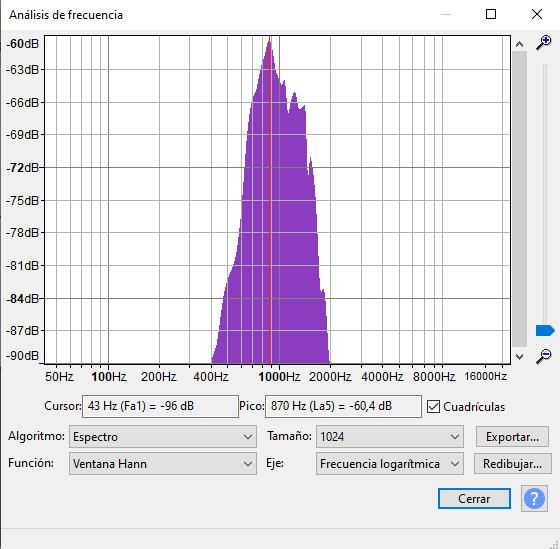

¿El resultado es el esperado? ¿Cumple con los requerimientos de la normativa?

*completar*

## Función conversión a escala logarítmica normalizada
Para visualizar correctamente la señal es necesario realizar una función que convierta la respuesta al impulso en escala logarítmica, utilizando la siguiente expresión:

\begin{equation}
    R(t) = 20\log_{10}\frac{A(t)}{A(t)_{max}}
\tag{11}
\end{equation}

Donde $A(t)$ es la señal que deseamos transformar de escala. **Consigna:** crear una función que convierta a escala logarítmica la RI que ingresa y devuelva un array con la señal resultante.

In [75]:
# completar

def esc_log (data_impulse, a = 20):
    A = data_impulse/(np.max(np.abs(data_impulse)))  #normalizacion
    Norm_log = a * np.log10(A)
    return Norm_log


Llamar a la función con alguna de las señales generadas anteriormente.

In [73]:
# completar
data_impulse, fs= sf.read("impulso.wav")    #Llamo a la funcion con la señal "impulso.wav"
B = esc_log(data_impulse)

C:\Users\Equipo\AppData\Local\Temp\ipykernel_9688\465197089.py:5: RuntimeWarning: divide by zero encountered in log10
  Norm_log = a * np.log10(A)
C:\Users\Equipo\AppData\Local\Temp\ipykernel_9688\465197089.py:5: RuntimeWarning: invalid value encountered in log10
  Norm_log = a * np.log10(A)


Visualizar la señal con la función creada en la primer entrega.

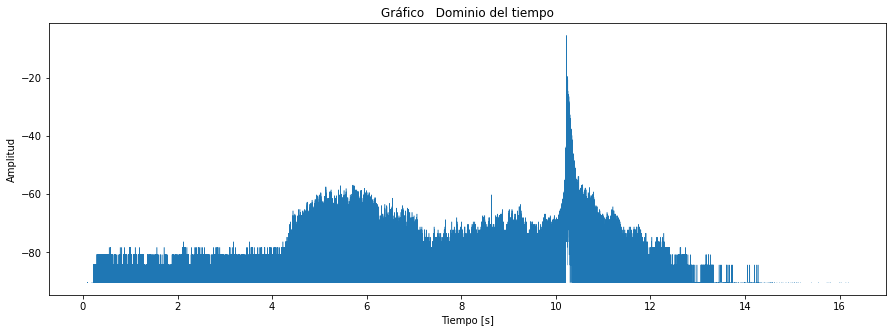

()

In [74]:
# completar
write('Norm_Log.wav', fs, B)             #Escribo como wav a la normalizacion , para graficar
from funciones import time_domain_plot
fs = 44100
time_domain_plot(B, fs)

### Informe preliminar (opcional)
Realizar un informe preliminar en formato UNTREF para memorias cuatrimestrales (disponible en el Drive de la asignatura), utilizando la plataforma de dición de documentos [LaTeX](https://es.wikipedia.org/wiki/LaTeX). Respetar las siguientes consignas:
1. Mencionar los detalles en el diseño de los scripts(con ayuda de diagramas de flujo o pseudocódigo) sin agregar código propiamente dicho.
2. Describir el dataset seleccionado para probar el software.
3. El informe debe reflejar la arquitectura del software desarrollado y los avances en la producción del mismo. Los datos que se informan tienen que ser relevantes y garantizar la reproducibilidad de los mismos. No ahondar en muchos detalles teóricos y definiciones(hacer uso de referencias),hacer más bien foco en la producción del software, su evaluación y su validación.
4. El informe preliminar no debe exceder las 3 páginas. Respetar fecha de entrega.
5. Respetar los siguientes porcentajes de contenido por sección(también determinan los grados de importancia)

A modo ilustrastivo se muestra los porcentajes del contenido en los informes:

| Resumen | Introducción | Marco teórico | Desarrollo experimental | Resultados | Conclusiones |
| -- | -- | -- | -- | -- | --  |
| 5% | 10% | 10% | 25% | 30% | 20% |

> Más información en el siguiente [link](https://github.com/maxiyommi/signal-systems/tree/master/trabajo_practico#informe-t%C3%A9cnico).